In [1]:
import warnings


In [3]:
#导入深度学习框架pytorch和科学计算库numpy
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用米正常显示负号

In [7]:
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

#载入数据时使用的处理器个数
num_workers =0
#每一批的数据个数
batch_size=20
#验证集所占比例
valid_size =0.2
#将数据转换为Pytorch的张量Tensor类型
transform = transforms.ToTensor()
#选择训练集和测试集，root:数据集文件根目录这里是data/NIsThraw
# tain:是否载入训练集
# domnioad:如果目灵中找不到数据集，是否自动下载
# tuansform:将载入的数据按上面tansform定义的方式进行转换
train_data = datasets.MNIST(root= 'data', train=True,download=True,transform=transform)
test_data = datasets.MNIST(root='data' , train=False,download=True,transform=transform)

#将训练集每张图像对应的索引随机打乱，将索引分为训练集索引和验证集索引
num_train =len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size*num_train))
train_idx, valid_idx= indices[split:], indices[:split]
#划分为新的训练集和验证集
train_sampler=SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

#创建训练集、验证集、测试集的数据Loader，python中的生成器，每一次调用返回一个batch的数据
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
sampler=train_sampler,num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
sampler=valid_sampler,num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size,
num_workers=num_workers)

## 可视化数据

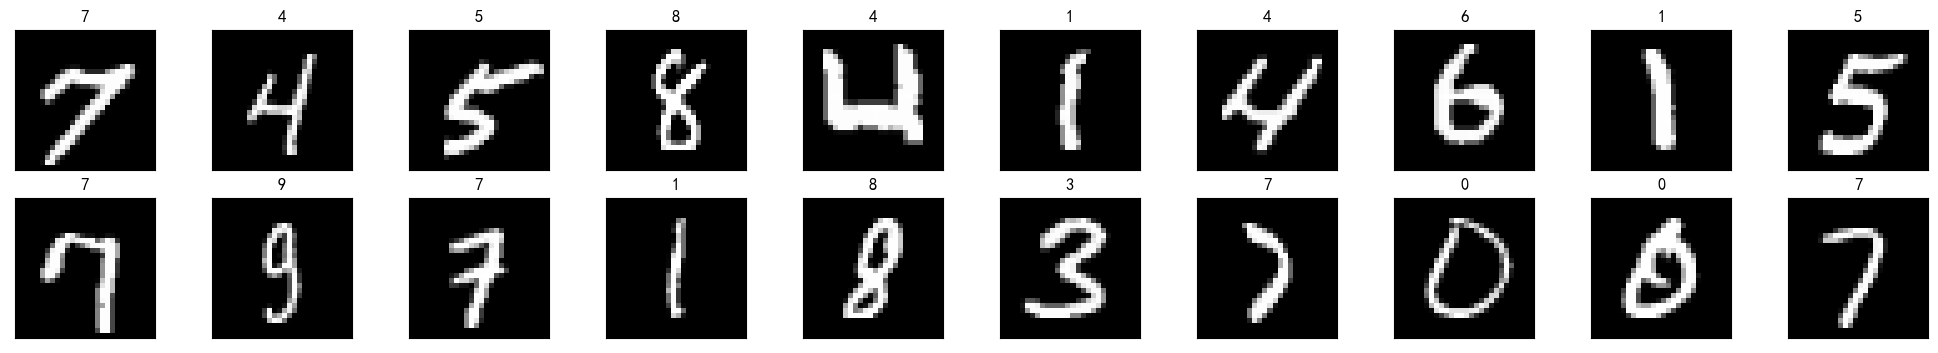

In [15]:
#可重复运行，展示不同的图片
#构造迭代器，获得训练集中的一批次数据
data_iter =iter(train_loader)

#在 Python 中，iter() 和 next() 是设计上用于迭代器的一部分，
#而 .next() 是旧版本的 Python 中对迭代器的访问方法，已经在 Python 3 中被弃用了。
images, labels = next(data_iter)

#将数据集中的iensor张量转为numpy的array数据类型
images =images.numpy()
# 可视化图片和标签
fig = plt.figure(figsize=(25,4))
for idx in np.arange(20):
    ax = fig.add_subplot(2,20//2,idx+1, xticks=[],yticks=[])    # 原来是"/"会有问题
    ax.imshow(np.squeeze(images[idx]),cmap='gray')
    #.item()获取张量的数值
    ax.set_title(str(labels[idx].item()))